In [1]:
import mlrose2 as mlrose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import time

# Define Optmization Problem 
**Only run cells corresponding to one optmization problem following by solving algorithms each time**

## K-Coloring 

In [14]:
edges = [(14, 17), (10, 11), (8, 13), (10, 17), (5, 13), (5, 19), (15, 16), (18, 19), (0, 10), (7, 16), (15, 19), (7, 11), (3, 7), (0, 3), (11, 19), (6, 7), (7, 15), (4, 19), (12, 13), (14, 18), (10, 18), (9, 11), (12, 17), (7, 10), (11, 18), (8, 16), (6, 15), (16, 18), (2, 16), (17, 19), (2, 6), (9, 14), (5, 11), (4, 5), (5, 17), (10, 13), (13, 15), (10, 19), (4, 14), (1, 4), (1, 19), (14, 15), (0, 5), (13, 19), (8, 17), (6, 12), (16, 19), (11, 12), (3, 5), (2, 7), (17, 18), (7, 9), (11, 17), (14, 16), (7, 13), (4, 17), (8, 18), (9, 19), (3, 4), (9, 12)]

# Initialize fitness function object
fitness = mlrose.MaxKColor(edges)

# Define optimization problem object
problem = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness, maximize = False, max_val = 3)

## N-Queen 

In [2]:
# Initialize fitness function object
fitness = mlrose.Queens()

# Define optimization problem object
problem = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness, maximize = False, max_val = 20)

## Six-Peaks

In [75]:
# Initialize fitness function object
fitness = mlrose.SixPeaks()

# Define optimization problem object
problem = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize = False, max_val = 100)

## KnapSack

In [11]:
# Initialize fitness function object
weights = [10, 5, 2, 8, 15]
values = [1, 2, 3, 4, 5]
max_weight_pct = 0.6
fitness = mlrose.Knapsack(weights, values, max_weight_pct)

# Define optimization problem object
problem = mlrose.DiscreteOpt(length = 5, fitness_fn = fitness, maximize = False, max_val = 5)

## Travelling Saleperson Problems

In [23]:
# Create list of city coordinates
coords_list = [(32, 22), (11, 52), (37, 33), (69, 60), (4, 30), (28, 54), (59, 93), (37, 96)]


# Initialize fitness function object using coords_list
fitness_coords = mlrose.TravellingSales(coords = coords_list)

# Define optimization problem object
problem = mlrose.TSPOpt(length = len(coords_list), fitness_fn = fitness_coords, maximize=False)

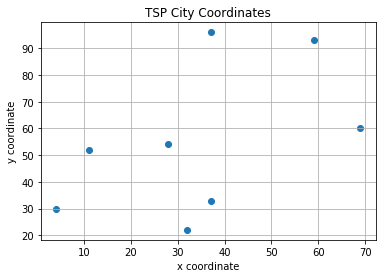

In [24]:
x, y = zip(*coords_list)
plt.scatter(x, y)
plt.grid()
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.title("TSP City Coordinates")
plt.show()

# Optimization algorithmes

### Genetic Algorithm

In [25]:
start = time.time()
# Set random seed
np.random.seed(2)

# Solve problem using the genetic algorithm
best_state, best_fitness, eval_loss, current_best_loss = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=50, 
                                                                            max_iters=np.inf)

end = time.time()

print("--- %s seconds ---" % (end - start))
print("--- best state %s ---" % best_state)
print("--- best fitness %s ---" % best_fitness)
print("--- number of iterations to converge %s ---" % len(eval_loss))

--- 10.950809240341187 seconds ---
--- best state [4 0 2 5 3 6 7 1] ---
--- best fitness 236.3675082867705 ---
--- number of iterations to converge 103 ---


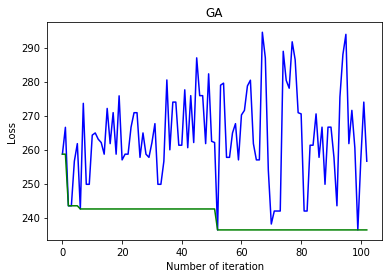

In [26]:
# loss change with number of iterations 
plt.plot(range(len(eval_loss)), eval_loss, color = 'blue')
plt.plot(range(len(current_best_loss)), current_best_loss, color = 'green')
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("GA")
plt.show()

### Randomized Hill Climbing

In [27]:
start = time.time()
# Set random seed
np.random.seed(2)

# Solve problem using the genetic algorithm
best_state, best_fitness, eval_loss, current_best_loss = mlrose.random_hill_climb(problem, max_attempts=10, 
                                                              max_iters=np.inf, restarts=5, init_state=None)

end = time.time()
print("--- %s seconds ---" % (end - start))
print("--- best state %s ---" % best_state)
print("--- best fitness %s ---" % best_fitness)
print("--- number of iterations to converge %s ---" % len(eval_loss))

--- 0.05302000045776367 seconds ---
--- best state [7 6 3 5 2 0 4 1] ---
--- best fitness 236.3675082867705 ---
--- number of iterations to converge 133 ---


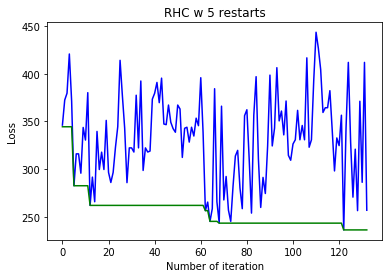

In [28]:
# loss change with number of iterations 
plt.plot(range(len(eval_loss)), eval_loss, color = 'blue')
plt.plot(range(len(current_best_loss)), current_best_loss, color = 'green')
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("RHC w 5 restarts")
plt.show()

### Simulated Annealing

In [43]:
start = time.time()
# Set random seed
np.random.seed(2)

# Solve problem using the genetic algorithm
best_state, best_fitness, eval_loss, current_best_loss = mlrose.simulated_annealing(problem, max_attempts=10,
                                                             max_iters=np.inf, init_state=None)

end = time.time()
print("--- %s seconds ---" % (end - start))
print("--- best state %s ---" % best_state)
print("--- best fitness %s ---" % best_fitness)
print("--- number of iterations to converge %s ---" % len(eval_loss))

--- 0.01156306266784668 seconds ---
--- best state [4 0 2 3 7 6 5 1] ---
--- best fitness 243.46602034615563 ---
--- number of iterations to converge 25 ---


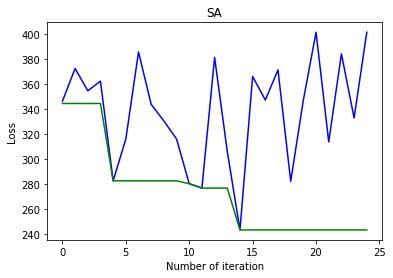

In [44]:
# loss change with number of iterations 
plt.plot(range(len(eval_loss)), eval_loss, color = 'blue')
plt.plot(range(len(current_best_loss)), current_best_loss, color = 'green')
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("SA")
plt.show()

### MIMIC

In [57]:
start = time.time()
# Set random seed
np.random.seed(10)

# Solve problem using the genetic algorithm
best_state, best_fitness, eval_loss, current_best_loss = mlrose.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=10, max_iters=np.inf)

end = time.time()
print("--- %s seconds ---" % (end - start))
print("--- best state %s ---" % best_state)
print("--- best fitness %s ---" % best_fitness)
print("--- number of iterations to converge %s ---" % len(eval_loss))

--- 3.4076380729675293 seconds ---
--- best state [5 3 6 7 1 4 0 2] ---
--- best fitness 236.3675082867705 ---
--- number of iterations to converge 11 ---


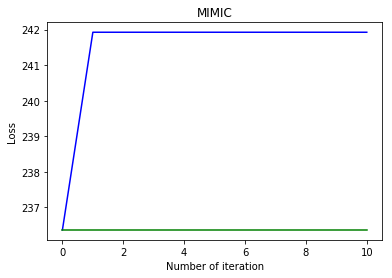

In [58]:
# loss change with number of iterations 
plt.plot(range(len(eval_loss)), eval_loss, color = 'blue')
plt.plot(range(len(current_best_loss)), current_best_loss, color = 'green')
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("MIMIC")
plt.show()